In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import rasterio.mask
import os # Recommended for path joining
import xarray as xr
import rioxarray 
import regionmask
import cartopy.crs as ccrs # Para plotagem de mapas
import cartopy.feature as cfeature # Para adicionar feições ao mapa
import netCDF4
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import seaborn as sn

# Open and plot SPEI data
## SPEI is a nc file from merge with 10km resolution

/tmp/ipykernel_1372/421688343.py:8: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  plt.imshow(nc['spei_gamma_01'][:-1,:,0])
/tmp/ipykernel_1372/421688343.py:8: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  plt.imshow(nc['spei_gamma_01'][:-1,:,0])


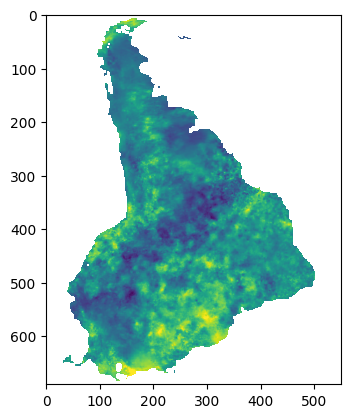

In [36]:
fp= 'MERGE_CPTEC_spei_gamma_01.nc'
nc = netCDF4.Dataset(fp)
LatRange = nc.variables['lat'][:]
LonRange = nc.variables['lon'][:]
SPEI = nc.variables['spei_gamma_01']


plt.imshow(nc['spei_gamma_01'][:-1,:,0])
plt.show()

# Open with the mask

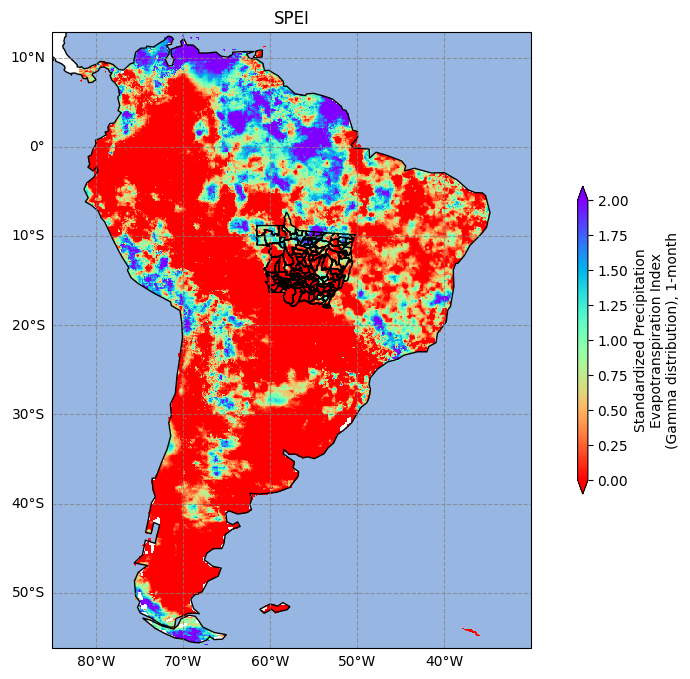

In [40]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
ds = xr.open_dataset(r'MERGE_CPTEC_spei_gamma_01.nc')

# Compute the yearly mean rainfall
# yearly_mean = ds.spei_gamma_01.mean(dim='time')
yearly_mean = ds.spei_gamma_01[:,:,0]

# Load the shapefile
shapefile_path = r'/home/jovyan/Desktop/enandes_v2/modelo_produtividade/MT_municipios_2023/MT_Municipios_2023.shp'
gdf = gpd.read_file(shapefile_path)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the plot
ax.coastlines()
ax.add_feature(cfeature.OCEAN)

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.7)
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.left_labels = True
gridlines.bottom_labels = True

# Adjust the padding and font size of the labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Plot the yearly mean rainfall
pc = yearly_mean.plot.pcolormesh(ax=ax, cmap='rainbow_r', vmin=0, vmax=2,
                                cbar_kwargs={'orientation': 'vertical', 'pad': 0.06, 'shrink': 0.5, 'aspect': 30})

# Overlay the shapefile using geopandas
gdf.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)

# Set the title
ax.set_title('SPEI')

# Show the plot
plt.show()

# Mask data

In [41]:

# Correctly specify the paths to the files
netcdf_file = r'MERGE_CPTEC_spei_gamma_01.nc'
shapefile = r'/home/jovyan/Desktop/enandes_v2/modelo_produtividade/MT_municipios_2023/MT_Municipios_2023.shp'

# Open the dataset using xarray
data = xr.open_dataset(netcdf_file)

# Set spatial dimensions and CRS
data = data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data = data.rio.write_crs("epsg:4326", inplace=True)

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile)
gdf = gdf.to_crs(data.rio.crs)

# Extract geometries from the GeoDataFrame
geometries = gdf.geometry

# Clip the dataset using the geometries
clipped_data = data.rio.clip(geometries, gdf.crs)

# Save the clipped data to a new NetCDF file
output_path = r'masked_spei.nc'
clipped_data.to_netcdf(output_path)

# Display the clipped data
print(clipped_data)

<xarray.Dataset> Size: 15MB
Dimensions:        (time: 305, lon: 114, lat: 106)
Coordinates:
  * time           (time) datetime64[ns] 2kB 2000-01-01T12:00:00 ... 2025-05-...
  * lon            (lon) float64 912B -61.55 -61.45 -61.35 ... -50.35 -50.25
  * lat            (lat) float64 848B -17.95 -17.85 -17.75 ... -7.65 -7.55 -7.45
    spatial_ref    int64 8B 0
Data variables:
    spei_gamma_01  (lat, lon, time) float32 15MB nan nan nan nan ... nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jun  2 16:19:31 2025: /home/ioper/bin/miniconda3/envs/i...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 5.1.3 (Homepage = http://nco.sf.ne...


# Test masked data

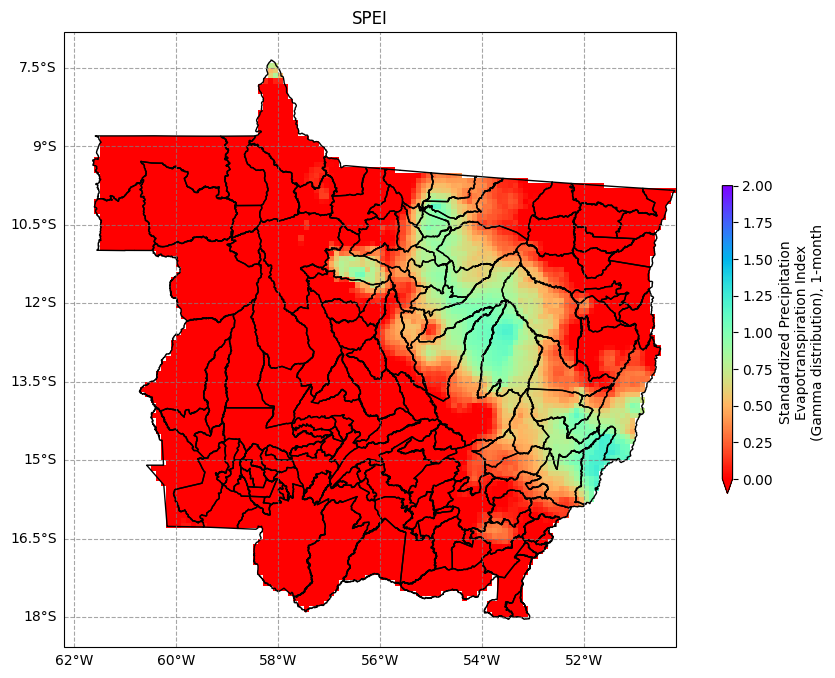

In [44]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
ds = xr.open_dataset(r'masked_spei.nc')

# Compute the yearly mean rainfall
# yearly_mean = ds.spei_gamma_01.mean(dim='time')
yearly_mean = ds.spei_gamma_01[:,:,5]

# Load the shapefile
shapefile_path = r'/home/jovyan/Desktop/enandes_v2/modelo_produtividade/MT_municipios_2023/MT_Municipios_2023.shp'
gdf = gpd.read_file(shapefile_path)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the plot
ax.coastlines()
ax.add_feature(cfeature.OCEAN)

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.7)
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.left_labels = True
gridlines.bottom_labels = True

# Adjust the padding and font size of the labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Plot the yearly mean rainfall
pc = yearly_mean.plot.pcolormesh(ax=ax, cmap='rainbow_r', vmin=0, vmax=2,
                                cbar_kwargs={'orientation': 'vertical', 'pad': 0.06, 'shrink': 0.5, 'aspect': 30})

# Overlay the shapefile using geopandas
gdf.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)

# Set the title
ax.set_title('SPEI')

# Show the plot
plt.show()

# Mask for Alto Teles Pires

In [ ]:


# Correctly specify the paths to the files
netcdf_file = r'MERGE_CPTEC_spei_gamma_01.nc'
shapefile = r'/home/jovyan/Desktop/enandes_v2/modelo_produtividade/MT_municipios_2023/MT_Municipios_2023.shp'

# Open the dataset using xarray
data = xr.open_dataset(netcdf_file)

# Set spatial dimensions and CRS
data = data.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
data = data.rio.write_crs("epsg:4326", inplace=True)

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile)
values_to_highlight = ['5105903','5104526', '5104542', '5105259', '5106224', '5106240', '5107768', '5107925', '5108006', '5108501']
column_to_filter = 'CD_MUN' # RGI = '510001' e 510008  - Alto Teles
highlight_gdf = gdf[gdf[column_to_filter].isin(values_to_highlight)]

highlight_gdf = highlight_gdf.to_crs(data.rio.crs)

# Extract geometries from the GeoDataFrame
geometries = highlight_gdf.geometry

# Clip the dataset using the geometries
clipped_data = data.rio.clip(geometries, highlight_gdf.crs)

# Save the clipped data to a new NetCDF file
output_path = r'masked_spei_ATP_MT.nc'
clipped_data.to_netcdf(output_path)

# Display the clipped data
print(clipped_data)

# Test new mask

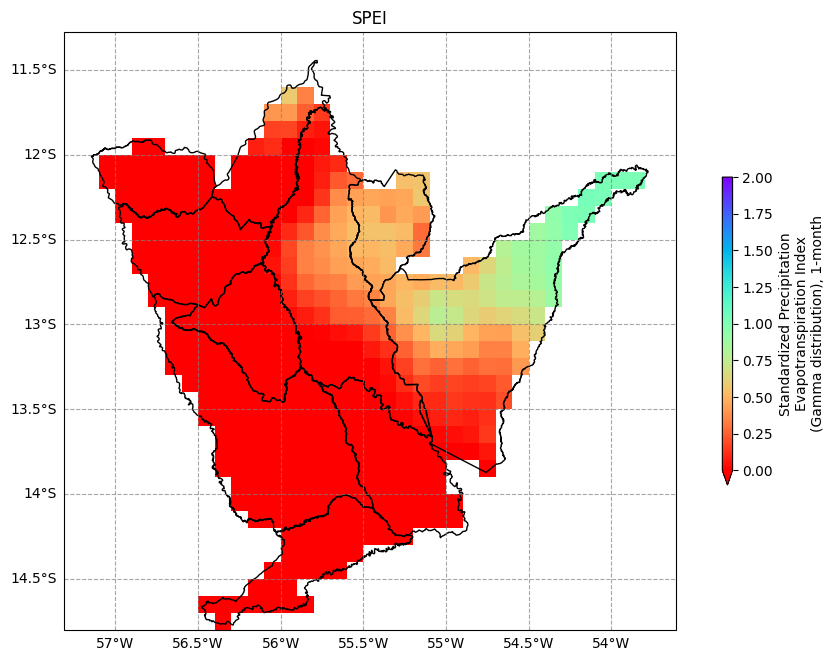

In [48]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the dataset
ds = xr.open_dataset(r'masked_spei_ATP_MT.nc')

# Compute the yearly mean rainfall
# yearly_mean = ds.spei_gamma_01.mean(dim='time')
yearly_mean = ds.spei_gamma_01[:,:,5]

# Load the shapefile
shapefile_path = r'/home/jovyan/Desktop/enandes_v2/modelo_produtividade/MT_municipios_2023/MT_Municipios_2023.shp'
gdf = gpd.read_file(shapefile_path)

values_to_highlight = ['5105903','5104526', '5104542', '5105259', '5106224', '5106240', '5107768', '5107925', '5108006', '5108501']
column_to_filter = 'CD_MUN' # RGI = '510001' e 510008  - Alto Teles
highlight_gdf = gdf[gdf[column_to_filter].isin(values_to_highlight)]


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the plot
ax.coastlines()
ax.add_feature(cfeature.OCEAN)

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.7)
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.left_labels = True
gridlines.bottom_labels = True

# Adjust the padding and font size of the labels
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Plot the yearly mean rainfall
pc = yearly_mean.plot.pcolormesh(ax=ax, cmap='rainbow_r', vmin=0, vmax=2,
                                cbar_kwargs={'orientation': 'vertical', 'pad': 0.06, 'shrink': 0.5, 'aspect': 30})

# Overlay the shapefile using geopandas
highlight_gdf.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1)

# Set the title
ax.set_title('SPEI')

# Show the plot
plt.show()

In [53]:
nc.variables['spei_gamma_01'].shape[2]

305

# Prepara dados

In [455]:
nc = Dataset('masked_spei_ATP_MT.nc','r')
list_spei = []
list_lat_lon = []

for i in range(nc.variables['spei_gamma_01'].shape[0]): #lat
    for j in range(nc.variables['spei_gamma_01'].shape[1]): #lon
        #print(i, j)
        list_spei.append(nc.variables['spei_gamma_01'][i,j,:])
        list_lat_lon.append([LatRange[i], LonRange[j]])

# LatRange = nc.variables['lat'][:] #32
# LonRange = nc.variables['lon'][:] #33

/tmp/ipykernel_1372/4239568944.py:8: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  list_spei.append(nc.variables['spei_gamma_01'][i,j,:])
/tmp/ipykernel_1372/4239568944.py:8: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  list_spei.append(nc.variables['spei_gamma_01'][i,j,:])


# Matriz de correlacao

In [246]:
matriz_spei = np.transpose(pd.DataFrame(list_spei))
matriz_lat_lon = np.transpose(pd.DataFrame(list_lat_lon))
matriz_correlacao = matriz_spei.corr()
print(matriz_correlacao)

/opt/conda/lib/python3.11/site-packages/pandas/core/internals/managers.py:1688: UserWarning: Warning: converting a masked element to nan.
  arr = np.array(blk.values, dtype=dtype, copy=copy)


      0     1     2     3     4     5     6     7     8     9     ...  1046  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1051   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1052   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1053   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1054   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
1055   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

      1047  1048  1049  1050  1051  1052  1053  105

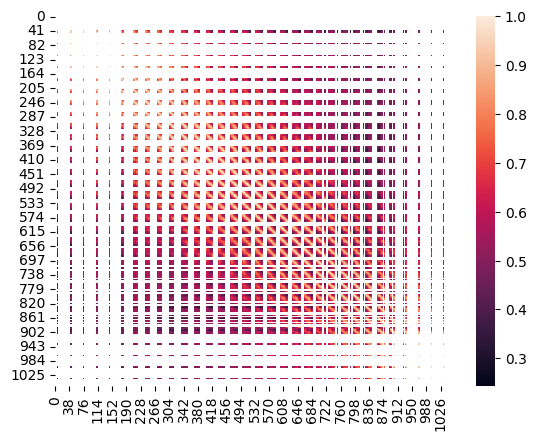

In [245]:
plot = sn.heatmap(matriz_correlacao, annot = False)

# teste eliminando dados mascarados

In [456]:
# cria lista de índices
list_nan = []
new_list_spei = []
new_list_lat_lon = []
for i in range(len(list_spei)):
    test = np.isnan(pd.Series(list_spei[i]))
    if test.max() == False:
        new_list_spei.append(list_spei[i])
        new_list_lat_lon.append(list_lat_lon[i])
    else:
        list_nan.append([i])
    
print(len(new_list_spei), len(new_list_lat_lon)) 

474 474


In [294]:
new_matriz_spei = np.transpose(pd.DataFrame(new_list_spei))
new_matriz_lat_lon = np.transpose(pd.DataFrame(new_list_lat_lon))
new_matriz_correlacao = new_matriz_spei.corr()
print(new_matriz_correlacao)

          0         1         2         3         4         5         6    \
0    1.000000  0.952003  0.957412  0.917658  0.834286  0.819132  0.802547   
1    0.952003  1.000000  0.988436  0.940989  0.860436  0.850385  0.838994   
2    0.957412  0.988436  1.000000  0.973888  0.905067  0.895956  0.875070   
3    0.917658  0.940989  0.973888  1.000000  0.971308  0.962465  0.920839   
4    0.834286  0.860436  0.905067  0.971308  1.000000  0.987868  0.921412   
..        ...       ...       ...       ...       ...       ...       ...   
469  0.411522  0.460832  0.458306  0.460799  0.449506  0.463879  0.498704   
470  0.387835  0.428554  0.427098  0.429654  0.419251  0.436740  0.467849   
471  0.350689  0.387403  0.387473  0.391287  0.384115  0.402567  0.428294   
472  0.405242  0.454906  0.455437  0.458400  0.448791  0.461022  0.493799   
473  0.373345  0.412612  0.412760  0.414907  0.404157  0.419678  0.448618   

          7         8         9    ...       464       465       466  \
0  

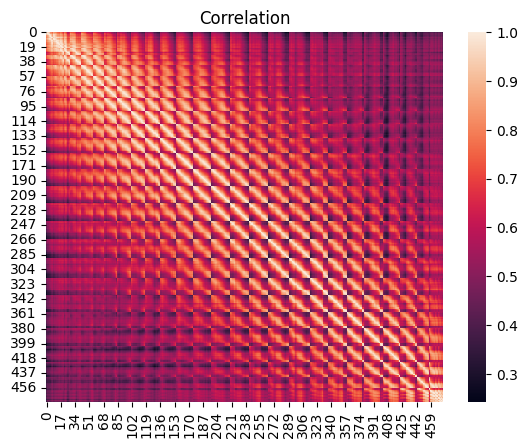

In [296]:
ax = plt.axes()
sn.heatmap(new_matriz_correlacao, ax = ax)
ax.set_title('Correlation')
plt.show()

In [297]:
distance_matrix = 1 - abs(new_matriz_correlacao)

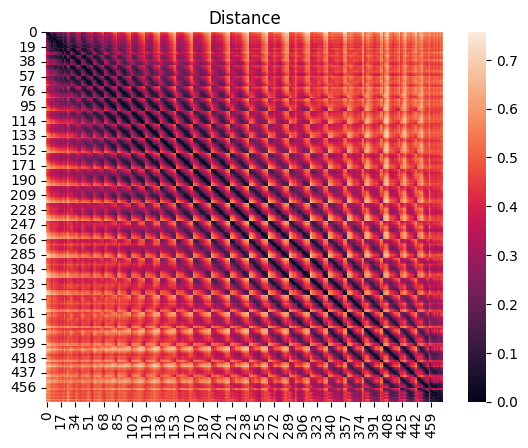

In [298]:
ax = plt.axes()
sn.heatmap(distance_matrix, ax = ax)
ax.set_title('Distance')
plt.show()

# criando clusters

In [262]:
# import numpy as np
# from sklearn.cluster import AgglomerativeClustering

# # agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
# # cluster_labels = agg_clustering.fit_predict(distance_matrix)

# cluster = AgglomerativeClustering(n_clusters = 2,metric='euclidean', linkage ='ward')
# cluster_labels = cluster.fit(new_matriz_spei)

# print(cluster_labels)

AgglomerativeClustering()


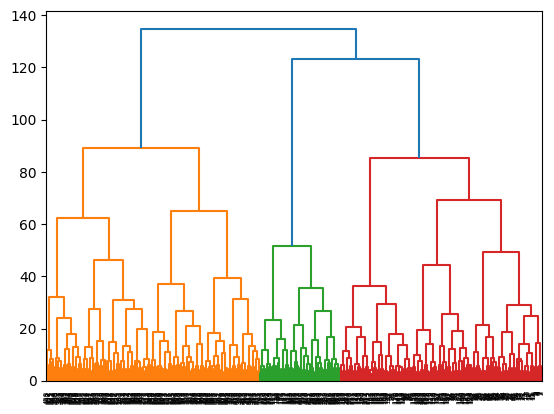

In [382]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

data_cluster = np.transpose(new_matriz_spei)
linkage_data = linkage(data_cluster, method='ward', metric='euclidean')

dendrogram(linkage_data)
plt.show()

In [383]:
# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = agg_cluster.fit_predict(data_cluster)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 4 4 4 4 4 2 0 0 0 0 0 0 0 4 4 4 4 4 4 4 2 2 2 0 0 0 0 0 0 0 4 4 4
 4 4 4 4 4 2 2 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 2 2 0 0 0 0 0 0 4 4 4 4 4 4
 4 4 4 2 2 2 2 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 2 2 2 2 0 0 0 0 0 0 3 4 4 4
 4 4 4 4 4 4 4 2 2 2 2 2 0 0 0 0 0 0 3 1 1 1 1 1 4 4 4 4 4 2 2 2 2 2 0 0 3
 3 3 3 3 1 1 1 1 1 4 4 4 4 4 2 2 2 2 2 2 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 3 3 3 3 3
 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 2 2 2 3
 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [384]:
print(data_cluster.shape, cluster_labels.shape)

(474, 305) (474,)


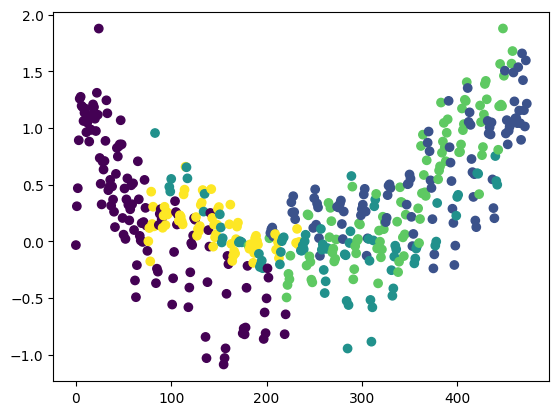

In [386]:
plt.scatter(x = pd.Series(range(0,474)), y=data_cluster[1], c=cluster_labels)

# teste mantendo NAs

In [434]:
nc = Dataset('masked_spei_ATP_MT.nc','r')
print(new_list_lat_lon[0])

[-14.749999999999993, -56.34999999999999]


In [487]:

fill_list_lat_lon = list_lat_lon
fill_list_spei_cluster = list_spei
for k in range(len(new_list_lat_lon)):
    lats = new_list_lat_lon[k][0]
    lons = new_list_lat_lon[k][1]
    indice = fill_list_lat_lon.index([lats, lons]) 
    fill_list_spei_cluster[indice] = cluster_labels[k]

# fill_list_lat_lon = list_lat_lon
# fill_list_spei = list_spei
# k=0
# lats = new_list_lat_lon[k][0]
# lons = new_list_lat_lon[k][1]
# indice = fill_list_lat_lon.index([lats, lons]) 
# fill_list_spei[indice] = new_list_spei[k]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2301990768.py, line 1)

In [486]:
# cluster_labels.shape


474